#### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

#### About the Dataset

In [2]:
df = pd.read_csv("C:\\Trash\\Housing.csv")

print(df.head())

print(df.info())

print(df.shape)

print(df.columns)

print(df.describe())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

#### Pre Processing

In [3]:
print(df.isnull().sum())

at_var = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

test_var = df.iloc[:,2]

print(*test_var)

for i in range(len(cat_var)):
    print(cat_var[i], df[cat_var[i]].nunique(), df[cat_var[i]].unique())

var = ['prefarea','airconditioning','hotwaterheating','basement','guestroom','mainroad']

def binary_map(x):
    return list(x.map({'yes': 1, 'no': 0}))

df[var] = df[var].apply(binary_map)

print(df.head())

fs = "furnishingstatus"

status = pd.get_dummies(df[fs],drop_first=True)
df.drop(['furnishingstatus'], axis=1, inplace=True)
#print(df["furnishingstatus"].head())

#df.insert(13,'furnishing',status)

df = pd.concat([df, status], axis=1)



print("--------------------")
#print(dir(status))
print(status)
print("---------------")
print(df.head())

print(df.columns)



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
4 4 3 4 4 3 4 5 4 3 3 4 4 4 3 4 4 3 3 3 3 3 3 3 3 4 3 3 5 4 3 3 4 3 5 3 3 4 3 4 3 3 3 4 4 3 3 3 3 3 3 3 4 3 3 3 4 4 4 3 3 2 4 4 3 3 2 3 3 4 3 4 3 2 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 2 3 3 4 3 3 3 3 4 3 3 3 3 3 3 4 3 4 4 3 3 6 3 2 3 3 4 3 3 3 3 4 4 3 3 3 3 3 3 3 4 3 3 3 3 4 4 3 3 3 4 4 5 4 3 2 3 3 4 3 4 5 3 3 3 3 4 3 3 4 3 4 3 3 3 3 2 4 4 3 3 3 4 3 4 3 3 3 3 4 3 3 3 3 3 2 3 2 2 4 3 3 2 3 4 3 3 3 3 3 3 2 4 3 3 2 3 3 3 3 3 4 4 2 3 3 3 2 3 4 4 2 3 2 2 3 2 3 4 2 3 3 3 3 3 2 3 4 3 3 3 3 3 3 3 3 4 2 4 3 3 3 2 4 2 3 3 3 2 3 3 2 3 2 3 3 3 4 3 3 5 3 4 4 2 2 2 3 2 2 2 3 4 2 3 3 3 3 2 4 3 4 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 2 3 3 2 2 4 3 3 4 3 3 3 3 3 4 4 3 3 3 2 3 4 3 2 2 3 4 2 4 5 2 3 2 2 3 2 3 2 3 2

NameError: name 'cat_var' is not defined

####  Using iloc to select input and output features

In [ ]:
#print(df.head())

X = df.iloc[:,1:]
y = df.iloc[:,0]


#### Splitting of dataset into Train and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


#### OLS Model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     74.21
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          3.02e-100
Time:                        08:04:21   Log-Likelihood:                -6644.2
No. Observations:                 436   AIC:                         1.332e+04
Df Residuals:                     422   BIC:                         1.337e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.442e+04   2.78e+05     

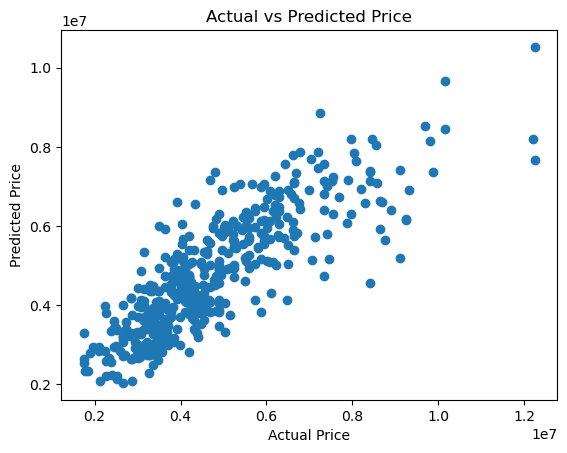

In [ ]:
model = sm.OLS(y_train, X_train)

ols = model.fit()

print(ols.summary())

y_pred = ols.predict()

print('y_pred : ',y_pred)

mse = mean_squared_error(y_train, y_pred)

print("mean squared error : ",mse)

new_rec = [[1,9000,4,2,3,1,0,0,0,1,2,1,0,0]]
print(ols.predict(new_rec))

y_true = y_train

y_pred = ols.predict()

plt.plot(y_true, y_pred, 'o')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()


#### SGD Regression

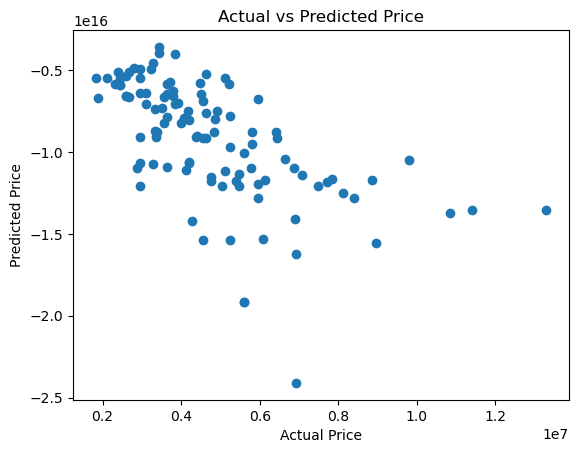

Mean squared error: 9.769993736172786e+31
predicted sales output :  [2.57768748e+16]


C:\Users\souma\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


In [ ]:
sgd = SGDRegressor()

sgd.fit(X_train,y_train)

prediction = sgd.predict(X_test)

#print('sgd',prediction)

plt.plot(y_test, prediction, 'o')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

mse = mean_squared_error(y_test, prediction)

print("Mean squared error:", mse)
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

prediction = sgd.predict(new_rec)

print('predicted sales output : ',prediction)